In [1]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
#import seaborn as sns

onion = pd.read_csv('C:/sa/week/onion_week.csv', encoding='cp949')

onion.head()

,week,retail price,avgTemp,minTemp,maxTemp,rainfall,exchange rate,export volume,export value,import volume,import value,production,cultivation area,market price
0,01월 1주 (2014.01.02 ~ 2014.01.08),"1,755",1.657143,-3.242857,7.628571,0.442857,1061.77,NaN,NaN,165.9500,98167173.75,3312.414175,498.145833,82.358
1,01월 2주 (2014.01.09 ~ 2014.01.15),"1,835",-2.700000,-7.728571,2.900000,0.000000,1061.80,NaN,NaN,165.9500,98167173.75,3312.414175,498.145833,82.358
2,01월 3주 (2014.01.16 ~ 2014.01.22),"1,830",-1.128571,-5.742857,4.057143,0.414286,1080.35,NaN,NaN,165.9500,98167173.75,3312.414175,498.145833,82.358
3,01월 4주 (2014.01.23 ~ 2014.01.29),"1,795",-1.000000,-4.314286,9.100000,0.414286,1081.31,NaN,NaN,165.9500,98167173.75,3312.414175,498.145833,82.358
4,02월 1주 (2014.02.03 ~ 2014.02.05),"1,882",2.671429,-2.285714,8.085714,1.071429,1075.00,NaN,NaN,88.0475,54007852.5,3312.414175,498.145833,83.296


In [2]:
onion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   week              557 non-null    object 
 1   retail price      557 non-null    object 
 2   avgTemp           557 non-null    float64
 3   minTemp           557 non-null    float64
 4   maxTemp           557 non-null    float64
 5   rainfall          557 non-null    float64
 6   exchange rate     557 non-null    float64
 7   export volume     39 non-null     object 
 8   export value      39 non-null     object 
 9   import volume     552 non-null    float64
 10  import value      552 non-null    object 
 11  production        522 non-null    float64
 12  cultivation area  552 non-null    float64
 13  market price      557 non-null    float64
dtypes: float64(9), object(5)
memory usage: 61.1+ KB


In [3]:
for column in onion.columns:
    if onion[column].dtype == 'object':
        onion[column] = onion[column].str.replace(',','')


for column in onion.columns:
    if column != 'week':
        onion[column] = pd.to_numeric(onion[column])

#onion = onion.replace(0,np.nan)

onion.head()

,week,retail price,avgTemp,minTemp,maxTemp,rainfall,exchange rate,export volume,export value,import volume,import value,production,cultivation area,market price
0,01월 1주 (2014.01.02 ~ 2014.01.08),1755,1.657143,-3.242857,7.628571,0.442857,1061.77,NaN,NaN,165.9500,98167173.75,3312.414175,498.145833,82.358
1,01월 2주 (2014.01.09 ~ 2014.01.15),1835,-2.700000,-7.728571,2.900000,0.000000,1061.80,NaN,NaN,165.9500,98167173.75,3312.414175,498.145833,82.358
2,01월 3주 (2014.01.16 ~ 2014.01.22),1830,-1.128571,-5.742857,4.057143,0.414286,1080.35,NaN,NaN,165.9500,98167173.75,3312.414175,498.145833,82.358
3,01월 4주 (2014.01.23 ~ 2014.01.29),1795,-1.000000,-4.314286,9.100000,0.414286,1081.31,NaN,NaN,165.9500,98167173.75,3312.414175,498.145833,82.358
4,02월 1주 (2014.02.03 ~ 2014.02.05),1882,2.671429,-2.285714,8.085714,1.071429,1075.00,NaN,NaN,88.0475,54007852.50,3312.414175,498.145833,83.296


In [4]:
onion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   week              557 non-null    object 
 1   retail price      557 non-null    int64  
 2   avgTemp           557 non-null    float64
 3   minTemp           557 non-null    float64
 4   maxTemp           557 non-null    float64
 5   rainfall          557 non-null    float64
 6   exchange rate     557 non-null    float64
 7   export volume     39 non-null     float64
 8   export value      39 non-null     float64
 9   import volume     552 non-null    float64
 10  import value      552 non-null    float64
 11  production        522 non-null    float64
 12  cultivation area  552 non-null    float64
 13  market price      557 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 61.1+ KB


In [5]:
nan_var = onion.isna().sum()/len(onion)
nan_var[nan_var>0.5]

export volume     0.929982
export value      0.929982
dtype: float64

In [6]:
remove_cal = nan_var[nan_var>0.5].index
onion = onion.drop(remove_cal, axis=1)
onion.head()

,week,retail price,avgTemp,minTemp,maxTemp,rainfall,exchange rate,import volume,import value,production,cultivation area,market price
0,01월 1주 (2014.01.02 ~ 2014.01.08),1755,1.657143,-3.242857,7.628571,0.442857,1061.77,165.9500,98167173.75,3312.414175,498.145833,82.358
1,01월 2주 (2014.01.09 ~ 2014.01.15),1835,-2.700000,-7.728571,2.900000,0.000000,1061.80,165.9500,98167173.75,3312.414175,498.145833,82.358
2,01월 3주 (2014.01.16 ~ 2014.01.22),1830,-1.128571,-5.742857,4.057143,0.414286,1080.35,165.9500,98167173.75,3312.414175,498.145833,82.358
3,01월 4주 (2014.01.23 ~ 2014.01.29),1795,-1.000000,-4.314286,9.100000,0.414286,1081.31,165.9500,98167173.75,3312.414175,498.145833,82.358
4,02월 1주 (2014.02.03 ~ 2014.02.05),1882,2.671429,-2.285714,8.085714,1.071429,1075.00,88.0475,54007852.50,3312.414175,498.145833,83.296


In [7]:
onion.isna().sum()

week                 0
retail price         0
avgTemp              0
minTemp              0
maxTemp              0
rainfall             0
exchange rate        0
import volume        5
import value         5
production          35
cultivation area     5
market price         0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

numeric_cols = onion.select_dtypes(include=['number']).columns

imputer = SimpleImputer(strategy='mean')
onion[numeric_cols] = imputer.fit_transform(onion[numeric_cols])

onion.isna().sum()

week                0
retail price        0
avgTemp             0
minTemp             0
maxTemp             0
rainfall            0
exchange rate       0
import volume       0
import value        0
production          0
cultivation area    0
market price        0
dtype: int64

In [9]:
X= onion[['exchange rate','avgTemp','maxTemp','minTemp','rainfall','import volume ','import value','production',
          'cultivation area']]
y = onion['retail price']

X_names = X.columns
X_names

Index(['exchange rate', 'avgTemp', 'maxTemp', 'minTemp', 'rainfall',
       'import volume ', 'import value', 'production', 'cultivation area'],
      dtype='object')

In [10]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  f_regression


sel_fr = SelectKBest(f_regression, k=3).fit(X, y)
print('\nf_regression: ') #F-value 회귀

print()
print('Selected features: ', [X_names[i] for i in sel_fr.get_support(indices=True)]) 




f_regression: 

Selected features:  ['exchange rate', 'import volume ', 'import value']


In [11]:

# SFS(Sequential Feature Selector) : 순차적으로 특성을 선택하는 방법

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3, direction='backward')


sfs.fit(X,y)


X_selected = sfs.transform(X)
X_selected_names = [X_names[i] for i in sfs.get_support(indices=True)]

print(f'{X_selected_names = }')


X_selected_names = ['exchange rate', 'import volume ', 'production']


### LSTM

In [14]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.losses import Huber

# 데이터 준비
X = onion[['rainfall', 'import volume ', 'import value', 'market price']].values
y = onion[['retail price']].values

# 데이터 정규화
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
y_scaled = scalerY.fit_transform(y)

# KFold 설정 (5개의 폴드 사용)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 1. 각 폴드별 MAE, MAPE, RMSE 저장 리스트
fold_mae_scores = []
fold_mape_scores = []
fold_rmse_scores = []
fold_histories = []  # 폴드별 학습 기록 저장 리스트
y_test_inverse_all = []  # 실제값 저장 리스트
y_pred_inverse_all = []  # 예측값 저장 리스트

# 2. K-fold 검증 루프
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled)):
    print(f'Fold {fold + 1}')

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # 모델 구성 및 학습
    lstm_model = Sequential()
    lstm_model.add(LSTM(32, activation='tanh', input_shape=(X_train.shape[1], 1)))
    lstm_model.add(Dropout(0.1))
    lstm_model.add(Dense(1))

    optimizer = Adam(learning_rate=0.01)
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=100, batch_size=10, verbose=2,
                        callbacks=[early_stopping])

    # 학습 기록 저장
    fold_histories.append(history.history)

    # 예측 및 역정규화
    y_val_pred = lstm_model.predict(X_val).flatten()
    y_val_pred_inverse = scalerY.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
    y_val_inverse = scalerY.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # 성능 지표 계산 및 저장
    mae = mean_absolute_error(y_val_inverse, y_val_pred_inverse)
    mape = mean_absolute_percentage_error(y_val_inverse, y_val_pred_inverse)
    rmse = np.sqrt(mean_squared_error(y_val_inverse, y_val_pred_inverse))

    print(f'Fold {fold + 1} - MAE: {mae:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}')

    fold_mae_scores.append(mae)
    fold_mape_scores.append(mape)
    fold_rmse_scores.append(rmse)

    # 예측 및 실제값 저장
    y_test_inverse_all.append(y_val_inverse)
    y_pred_inverse_all.append(y_val_pred_inverse)

# 3. 평균 성능 출력
print(f'\nAverage MAE across all folds: {np.mean(fold_mae_scores):.4f}')
print(f'Average MAPE across all folds: {np.mean(fold_mape_scores):.4f}')
print(f'Average RMSE across all folds: {np.mean(fold_rmse_scores):.4f}')

Fold 1
Epoch 1/100


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 63ms/step - loss: 0.0407 - mae: 0.1581 - val_loss: 0.0281 - val_mae: 0.1227
Epoch 2/100
45/45 - 0s - 4ms/step - loss: 0.0270 - mae: 0.1310 - val_loss: 0.0261 - val_mae: 0.1218
Epoch 3/100
45/45 - 0s - 5ms/step - loss: 0.0261 - mae: 0.1319 - val_loss: 0.0260 - val_mae: 0.1209
Epoch 4/100
45/45 - 0s - 4ms/step - loss: 0.0266 - mae: 0.1292 - val_loss: 0.0253 - val_mae: 0.1221
Epoch 5/100
45/45 - 0s - 4ms/step - loss: 0.0257 - mae: 0.1289 - val_loss: 0.0265 - val_mae: 0.1335
Epoch 6/100
45/45 - 0s - 4ms/step - loss: 0.0265 - mae: 0.1288 - val_loss: 0.0245 - val_mae: 0.1196
Epoch 7/100
45/45 - 0s - 4ms/step - loss: 0.0256 - mae: 0.1278 - val_loss: 0.0242 - val_mae: 0.1205
Epoch 8/100
45/45 - 0s - 4ms/step - loss: 0.0260 - mae: 0.1283 - val_loss: 0.0240 - val_mae: 0.1192
Epoch 9/100
45/45 - 0s - 4ms/step - loss: 0.0252 - mae: 0.1271 - val_loss: 0.0247 - val_mae: 0.1174
Epoch 10/100
45/45 - 0s - 4ms/step - loss: 0.0242 - mae: 0.1245 - val_loss: 0.0240 - val_mae: 0.1214
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 62ms/step - loss: 0.0490 - mae: 0.1693 - val_loss: 0.0271 - val_mae: 0.1268
Epoch 2/100
45/45 - 0s - 4ms/step - loss: 0.0271 - mae: 0.1328 - val_loss: 0.0254 - val_mae: 0.1286
Epoch 3/100
45/45 - 0s - 4ms/step - loss: 0.0267 - mae: 0.1313 - val_loss: 0.0258 - val_mae: 0.1292
Epoch 4/100
45/45 - 0s - 4ms/step - loss: 0.0261 - mae: 0.1296 - val_loss: 0.0241 - val_mae: 0.1239
Epoch 5/100
45/45 - 0s - 4ms/step - loss: 0.0267 - mae: 0.1304 - val_loss: 0.0243 - val_mae: 0.1257
Epoch 6/100
45/45 - 0s - 4ms/step - loss: 0.0269 - mae: 0.1290 - val_loss: 0.0245 - val_mae: 0.1267
Epoch 7/100
45/45 - 0s - 4ms/step - loss: 0.0261 - mae: 0.1290 - val_loss: 0.0260 - val_mae: 0.1320
Epoch 8/100
45/45 - 0s - 4ms/step - loss: 0.0255 - mae: 0.1259 - val_loss: 0.0246 - val_mae: 0.1265
Epoch 9/100
45/45 - 0s - 4ms/step - loss: 0.0254 - mae: 0.1282 - val_loss: 0.0251 - val_mae: 0.1303
Epoch 10/100
45/45 - 0s - 4ms/step - loss: 0.0250 - mae: 0.1266 - val_loss: 0.0242 - val_mae: 0.1282
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 57ms/step - loss: 0.0336 - mae: 0.1440 - val_loss: 0.0289 - val_mae: 0.1373
Epoch 2/100
45/45 - 0s - 5ms/step - loss: 0.0264 - mae: 0.1282 - val_loss: 0.0284 - val_mae: 0.1357
Epoch 3/100
45/45 - 0s - 4ms/step - loss: 0.0277 - mae: 0.1313 - val_loss: 0.0305 - val_mae: 0.1365
Epoch 4/100
45/45 - 0s - 4ms/step - loss: 0.0254 - mae: 0.1268 - val_loss: 0.0280 - val_mae: 0.1352
Epoch 5/100
45/45 - 0s - 4ms/step - loss: 0.0255 - mae: 0.1266 - val_loss: 0.0280 - val_mae: 0.1342
Epoch 6/100
45/45 - 0s - 6ms/step - loss: 0.0259 - mae: 0.1268 - val_loss: 0.0277 - val_mae: 0.1335
Epoch 7/100
45/45 - 0s - 6ms/step - loss: 0.0242 - mae: 0.1231 - val_loss: 0.0281 - val_mae: 0.1315
Epoch 8/100
45/45 - 0s - 6ms/step - loss: 0.0256 - mae: 0.1278 - val_loss: 0.0287 - val_mae: 0.1342
Epoch 9/100
45/45 - 0s - 4ms/step - loss: 0.0239 - mae: 0.1237 - val_loss: 0.0293 - val_mae: 0.1332
Epoch 10/100
45/45 - 0s - 4ms/step - loss: 0.0244 - mae: 0.1226 - val_loss: 0.0275 - val_mae: 0.1314
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 56ms/step - loss: 0.0415 - mae: 0.1564 - val_loss: 0.0261 - val_mae: 0.1232
Epoch 2/100
45/45 - 0s - 5ms/step - loss: 0.0273 - mae: 0.1317 - val_loss: 0.0265 - val_mae: 0.1411
Epoch 3/100
45/45 - 0s - 4ms/step - loss: 0.0269 - mae: 0.1330 - val_loss: 0.0260 - val_mae: 0.1387
Epoch 4/100
45/45 - 0s - 4ms/step - loss: 0.0278 - mae: 0.1331 - val_loss: 0.0258 - val_mae: 0.1383
Epoch 5/100
45/45 - 0s - 4ms/step - loss: 0.0257 - mae: 0.1274 - val_loss: 0.0257 - val_mae: 0.1198
Epoch 6/100
45/45 - 0s - 4ms/step - loss: 0.0261 - mae: 0.1293 - val_loss: 0.0243 - val_mae: 0.1281
Epoch 7/100
45/45 - 0s - 4ms/step - loss: 0.0255 - mae: 0.1270 - val_loss: 0.0241 - val_mae: 0.1213
Epoch 8/100
45/45 - 0s - 4ms/step - loss: 0.0260 - mae: 0.1280 - val_loss: 0.0235 - val_mae: 0.1209
Epoch 9/100
45/45 - 0s - 4ms/step - loss: 0.0250 - mae: 0.1250 - val_loss: 0.0235 - val_mae: 0.1270
Epoch 10/100
45/45 - 0s - 4ms/step - loss: 0.0260 - mae: 0.1287 - val_loss: 0.0233 - val_mae: 0.1193
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 58ms/step - loss: 0.0357 - mae: 0.1496 - val_loss: 0.0238 - val_mae: 0.1281
Epoch 2/100
45/45 - 0s - 4ms/step - loss: 0.0277 - mae: 0.1325 - val_loss: 0.0239 - val_mae: 0.1260
Epoch 3/100
45/45 - 0s - 4ms/step - loss: 0.0278 - mae: 0.1308 - val_loss: 0.0237 - val_mae: 0.1287
Epoch 4/100
45/45 - 0s - 4ms/step - loss: 0.0273 - mae: 0.1335 - val_loss: 0.0236 - val_mae: 0.1282
Epoch 5/100
45/45 - 0s - 4ms/step - loss: 0.0267 - mae: 0.1295 - val_loss: 0.0274 - val_mae: 0.1375
Epoch 6/100
45/45 - 0s - 4ms/step - loss: 0.0263 - mae: 0.1297 - val_loss: 0.0235 - val_mae: 0.1240
Epoch 7/100
45/45 - 0s - 4ms/step - loss: 0.0258 - mae: 0.1270 - val_loss: 0.0234 - val_mae: 0.1263
Epoch 8/100
45/45 - 0s - 4ms/step - loss: 0.0280 - mae: 0.1324 - val_loss: 0.0229 - val_mae: 0.1244
Epoch 9/100
45/45 - 0s - 4ms/step - loss: 0.0255 - mae: 0.1277 - val_loss: 0.0220 - val_mae: 0.1222
Epoch 10/100
45/45 - 0s - 4ms/step - loss: 0.0262 - mae: 0.1268 - val_loss: 0.0221 - val_mae: 0.1214
Epoch 11/1

In [ ]:
import numpy as np
import pandas as pd

def predict_future_weeks_extended(model, initial_data, scalerX, scalerY, weeks=13):
    predictions = []
    
    # 데이터를 모델 입력 형식으로 정규화하고 3D로 변형
    current_data = scalerX.transform(initial_data).reshape((1, initial_data.shape[1], 1))
    
    for week in range(weeks):
        # 모델을 사용해 예측
        predicted_scaled = model.predict(current_data)
        predicted_price = scalerY.inverse_transform(predicted_scaled).flatten()[0]
        
        # 예측 결과 저장
        predictions.append(predicted_price)
        
        # 다음 주차 예측을 위한 입력 데이터 갱신
        current_data = np.append(current_data[:, 1:], predicted_scaled.reshape(1, 1, 1), axis=1)
    
    return predictions

# 예측을 100번 수행하고 평균값 계산
num_predictions = 100
all_predictions = []

# 초기 데이터 설정 (양파 관련 데이터)
initial_data = onion[['rainfall', 'import volume ', 'import value', 'market price']].values[-1].reshape(1, -1)

for _ in range(num_predictions):
    predicted_prices = predict_future_weeks_extended(lstm_model, initial_data, scalerX, scalerY, weeks=13)
    all_predictions.append(predicted_prices)

# numpy 배열로 변환하여 평균값 계산
all_predictions = np.array(all_predictions)
average_predictions = np.mean(all_predictions, axis=0)

# 평균 예측 결과 출력
average_predictions_df = pd.DataFrame(average_predictions, columns=['Average Predicted Retail Price'])
average_predictions_df.index = pd.date_range(start='2024-09-01', periods=13, freq='W-SUN')
print(average_predictions_df)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

In [ ]:
# 4. Loss 그래프
plt.figure(figsize=(10, 5))
for fold, history in enumerate(fold_histories):
    plt.plot(history['loss'], label=f'Fold {fold + 1} - Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {fold + 1} - Val Loss')

plt.title('Loss per Epoch (K-Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

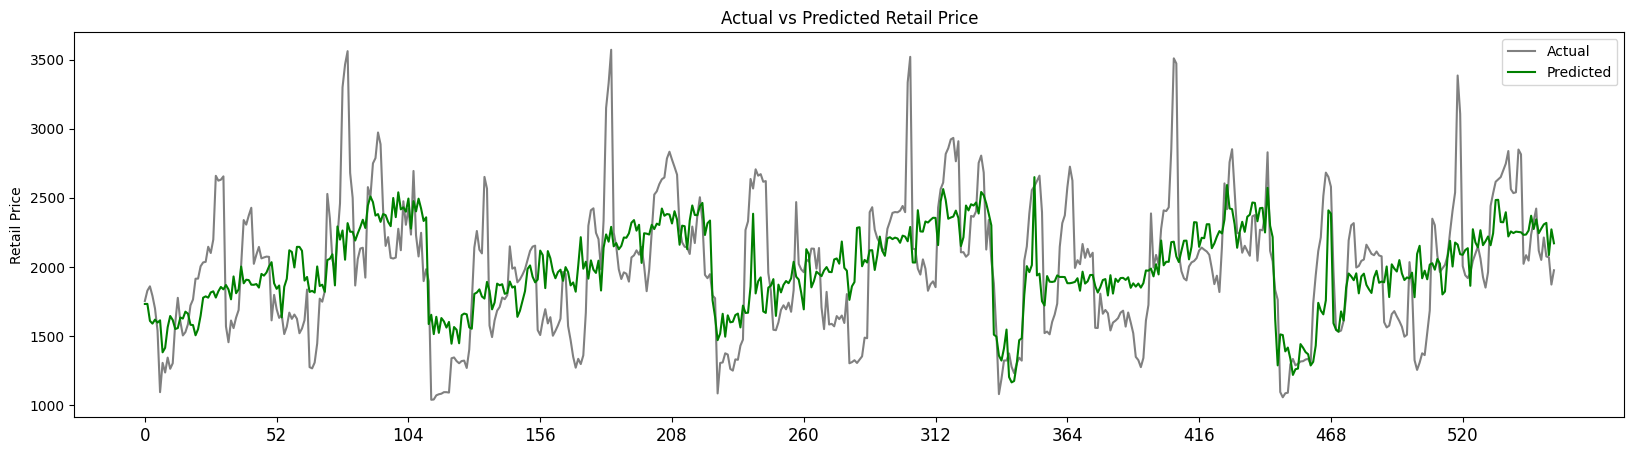

In [45]:
# 5. Actual vs Predicted 그래프
num_weeks = np.concatenate(y_test_inverse_all).shape[0]  # y_test_inverse_all의 길이로 num_weeks 정의

plt.figure(figsize=(20, 5))
plt.plot(np.concatenate(y_test_inverse_all), label='Actual', color='gray')
plt.plot(np.concatenate(y_pred_inverse_all), label='Predicted', color='green')
plt.title('Actual vs Predicted Retail Price')
plt.ylabel('Retail Price')

# X축 눈금 52주 간격으로 표시
plt.xticks(np.arange(0, num_weeks, step=52), fontsize=12)

plt.legend()
plt.show()


### GRU 

In [66]:
from keras.layers import LSTM, Dense, Dropout, GRU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


# 데이터 준비
X = onion[['rainfall', 'import volume ', 'import value', 'market price']].values
y = onion[['retail price']].values
, ''
# 데이터 정규화
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
y_scaled = scalerY.fit_transform(y)

# KFold 설정 (5개의 폴드 사용)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 1. 각 폴드별 MAE, MAPE, RMSE 저장 리스트
fold_mae_scores = []
fold_mape_scores = []
fold_rmse_scores = []
fold_histories = []  # 폴드별 학습 기록 저장 리스트
y_test_inverse_all = []  # 실제값 저장 리스트
y_pred_inverse_all = []  # 예측값 저장 리스트

# 2. K-fold 검증 루프
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled)):
    print(f'Fold {fold + 1}')

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # 모델 구성 및 학습
    gru_model = Sequential()
    gru_model.add(GRU(32, activation='tanh', input_shape=(X_train.shape[1], 1)))
    gru_model.add(Dropout(0.1))
    gru_model.add(Dense(1))

    optimizer = Adam(learning_rate=0.01)
    gru_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = gru_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=100, batch_size=10, verbose=2,
                        callbacks=[early_stopping])

    # 학습 기록 저장
    fold_histories.append(history.history)

    # 예측 및 역정규화
    y_val_pred = gru_model.predict(X_val).flatten()
    y_val_pred_inverse = scalerY.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
    y_val_inverse = scalerY.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # 성능 지표 계산 및 저장
    mae = mean_absolute_error(y_val_inverse, y_val_pred_inverse)
    mape = mean_absolute_percentage_error(y_val_inverse, y_val_pred_inverse)
    rmse = np.sqrt(mean_squared_error(y_val_inverse, y_val_pred_inverse))

    print(f'Fold {fold + 1} - MAE: {mae:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}')

    fold_mae_scores.append(mae)
    fold_mape_scores.append(mape)
    fold_rmse_scores.append(rmse)

    # 예측 및 실제값 저장
    y_test_inverse_all.append(y_val_inverse)
    y_pred_inverse_all.append(y_val_pred_inverse)

# 3. 평균 성능 출력
print(f'\nAverage MAE across all folds: {np.mean(fold_mae_scores):.4f}')
print(f'Average MAPE across all folds: {np.mean(fold_mape_scores):.4f}')
print(f'Average RMSE across all folds: {np.mean(fold_rmse_scores):.4f}')


Fold 1
Epoch 1/100


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 58ms/step - loss: 0.0370 - mae: 0.1552 - val_loss: 0.0254 - val_mae: 0.1252
Epoch 2/100
45/45 - 0s - 4ms/step - loss: 0.0285 - mae: 0.1351 - val_loss: 0.0295 - val_mae: 0.1250
Epoch 3/100
45/45 - 0s - 4ms/step - loss: 0.0265 - mae: 0.1299 - val_loss: 0.0271 - val_mae: 0.1222
Epoch 4/100
45/45 - 0s - 4ms/step - loss: 0.0261 - mae: 0.1303 - val_loss: 0.0262 - val_mae: 0.1215
Epoch 5/100
45/45 - 0s - 4ms/step - loss: 0.0266 - mae: 0.1301 - val_loss: 0.0276 - val_mae: 0.1216
Epoch 6/100
45/45 - 0s - 4ms/step - loss: 0.0255 - mae: 0.1270 - val_loss: 0.0249 - val_mae: 0.1192
Epoch 7/100
45/45 - 0s - 4ms/step - loss: 0.0255 - mae: 0.1270 - val_loss: 0.0244 - val_mae: 0.1238
Epoch 8/100
45/45 - 0s - 4ms/step - loss: 0.0256 - mae: 0.1271 - val_loss: 0.0297 - val_mae: 0.1257
Epoch 9/100
45/45 - 0s - 4ms/step - loss: 0.0256 - mae: 0.1277 - val_loss: 0.0263 - val_mae: 0.1188
Epoch 10/100
45/45 - 0s - 4ms/step - loss: 0.0255 - mae: 0.1275 - val_loss: 0.0256 - val_mae: 0.1178
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 50ms/step - loss: 0.0309 - mae: 0.1413 - val_loss: 0.0272 - val_mae: 0.1334
Epoch 2/100
45/45 - 0s - 4ms/step - loss: 0.0275 - mae: 0.1345 - val_loss: 0.0296 - val_mae: 0.1297
Epoch 3/100
45/45 - 0s - 4ms/step - loss: 0.0306 - mae: 0.1367 - val_loss: 0.0262 - val_mae: 0.1240
Epoch 4/100
45/45 - 0s - 4ms/step - loss: 0.0280 - mae: 0.1332 - val_loss: 0.0244 - val_mae: 0.1258
Epoch 5/100
45/45 - 0s - 4ms/step - loss: 0.0267 - mae: 0.1310 - val_loss: 0.0257 - val_mae: 0.1311
Epoch 6/100
45/45 - 0s - 4ms/step - loss: 0.0268 - mae: 0.1305 - val_loss: 0.0255 - val_mae: 0.1291
Epoch 7/100
45/45 - 0s - 4ms/step - loss: 0.0252 - mae: 0.1251 - val_loss: 0.0296 - val_mae: 0.1419
Epoch 8/100
45/45 - 0s - 4ms/step - loss: 0.0261 - mae: 0.1291 - val_loss: 0.0245 - val_mae: 0.1264
Epoch 9/100
45/45 - 0s - 4ms/step - loss: 0.0251 - mae: 0.1247 - val_loss: 0.0239 - val_mae: 0.1244
Epoch 10/100
45/45 - 0s - 4ms/step - loss: 0.0246 - mae: 0.1253 - val_loss: 0.0249 - val_mae: 0.1235
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 59ms/step - loss: 0.0353 - mae: 0.1440 - val_loss: 0.0310 - val_mae: 0.1379
Epoch 2/100
45/45 - 0s - 3ms/step - loss: 0.0268 - mae: 0.1306 - val_loss: 0.0390 - val_mae: 0.1485
Epoch 3/100
45/45 - 0s - 3ms/step - loss: 0.0265 - mae: 0.1278 - val_loss: 0.0303 - val_mae: 0.1442
Epoch 4/100
45/45 - 0s - 3ms/step - loss: 0.0263 - mae: 0.1277 - val_loss: 0.0281 - val_mae: 0.1348
Epoch 5/100
45/45 - 0s - 3ms/step - loss: 0.0251 - mae: 0.1264 - val_loss: 0.0355 - val_mae: 0.1426
Epoch 6/100
45/45 - 0s - 3ms/step - loss: 0.0264 - mae: 0.1304 - val_loss: 0.0283 - val_mae: 0.1327
Epoch 7/100
45/45 - 0s - 3ms/step - loss: 0.0238 - mae: 0.1230 - val_loss: 0.0283 - val_mae: 0.1321
Epoch 8/100
45/45 - 0s - 4ms/step - loss: 0.0262 - mae: 0.1270 - val_loss: 0.0287 - val_mae: 0.1340
Epoch 9/100
45/45 - 0s - 4ms/step - loss: 0.0256 - mae: 0.1263 - val_loss: 0.0280 - val_mae: 0.1328
Epoch 10/100
45/45 - 0s - 3ms/step - loss: 0.0245 - mae: 0.1233 - val_loss: 0.0277 - val_mae: 0.1327
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 55ms/step - loss: 0.0342 - mae: 0.1407 - val_loss: 0.0257 - val_mae: 0.1228
Epoch 2/100
45/45 - 0s - 3ms/step - loss: 0.0277 - mae: 0.1322 - val_loss: 0.0271 - val_mae: 0.1196
Epoch 3/100
45/45 - 0s - 3ms/step - loss: 0.0271 - mae: 0.1325 - val_loss: 0.0252 - val_mae: 0.1343
Epoch 4/100
45/45 - 0s - 3ms/step - loss: 0.0265 - mae: 0.1286 - val_loss: 0.0251 - val_mae: 0.1233
Epoch 5/100
45/45 - 0s - 4ms/step - loss: 0.0260 - mae: 0.1277 - val_loss: 0.0251 - val_mae: 0.1210
Epoch 6/100
45/45 - 0s - 3ms/step - loss: 0.0270 - mae: 0.1302 - val_loss: 0.0242 - val_mae: 0.1255
Epoch 7/100
45/45 - 0s - 3ms/step - loss: 0.0262 - mae: 0.1282 - val_loss: 0.0246 - val_mae: 0.1309
Epoch 8/100
45/45 - 0s - 3ms/step - loss: 0.0260 - mae: 0.1276 - val_loss: 0.0238 - val_mae: 0.1277
Epoch 9/100
45/45 - 0s - 4ms/step - loss: 0.0246 - mae: 0.1261 - val_loss: 0.0267 - val_mae: 0.1404
Epoch 10/100
45/45 - 0s - 4ms/step - loss: 0.0260 - mae: 0.1262 - val_loss: 0.0234 - val_mae: 0.1249
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 53ms/step - loss: 0.0660 - mae: 0.1901 - val_loss: 0.0264 - val_mae: 0.1274
Epoch 2/100
45/45 - 0s - 4ms/step - loss: 0.0277 - mae: 0.1322 - val_loss: 0.0236 - val_mae: 0.1278
Epoch 3/100
45/45 - 0s - 3ms/step - loss: 0.0266 - mae: 0.1312 - val_loss: 0.0256 - val_mae: 0.1341
Epoch 4/100
45/45 - 0s - 3ms/step - loss: 0.0267 - mae: 0.1302 - val_loss: 0.0254 - val_mae: 0.1331
Epoch 5/100
45/45 - 0s - 3ms/step - loss: 0.0274 - mae: 0.1325 - val_loss: 0.0232 - val_mae: 0.1256
Epoch 6/100
45/45 - 0s - 3ms/step - loss: 0.0289 - mae: 0.1328 - val_loss: 0.0236 - val_mae: 0.1275
Epoch 7/100
45/45 - 0s - 4ms/step - loss: 0.0265 - mae: 0.1301 - val_loss: 0.0238 - val_mae: 0.1282
Epoch 8/100
45/45 - 0s - 4ms/step - loss: 0.0265 - mae: 0.1298 - val_loss: 0.0243 - val_mae: 0.1298
Epoch 9/100
45/45 - 0s - 4ms/step - loss: 0.0265 - mae: 0.1297 - val_loss: 0.0227 - val_mae: 0.1237
Epoch 10/100
45/45 - 0s - 4ms/step - loss: 0.0258 - mae: 0.1290 - val_loss: 0.0228 - val_mae: 0.1220
Epoch 11/1

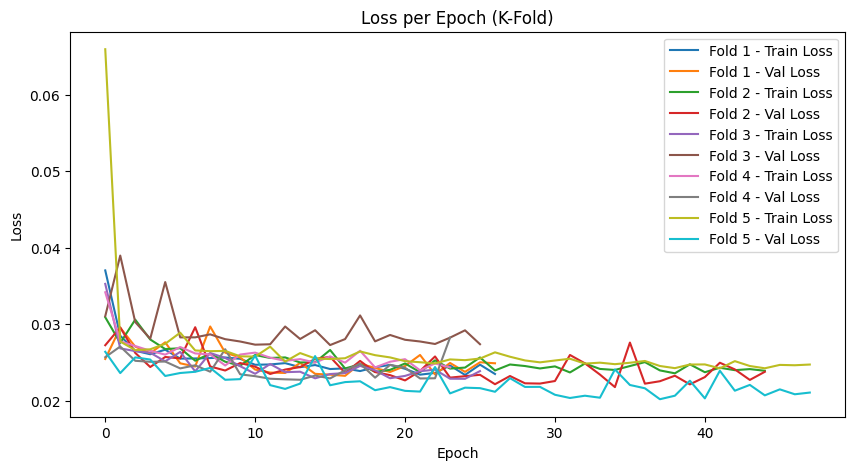

In [67]:
# 4. Loss 그래프
plt.figure(figsize=(10, 5))
for fold, history in enumerate(fold_histories):
    plt.plot(history['loss'], label=f'Fold {fold + 1} - Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {fold + 1} - Val Loss')

plt.title('Loss per Epoch (K-Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

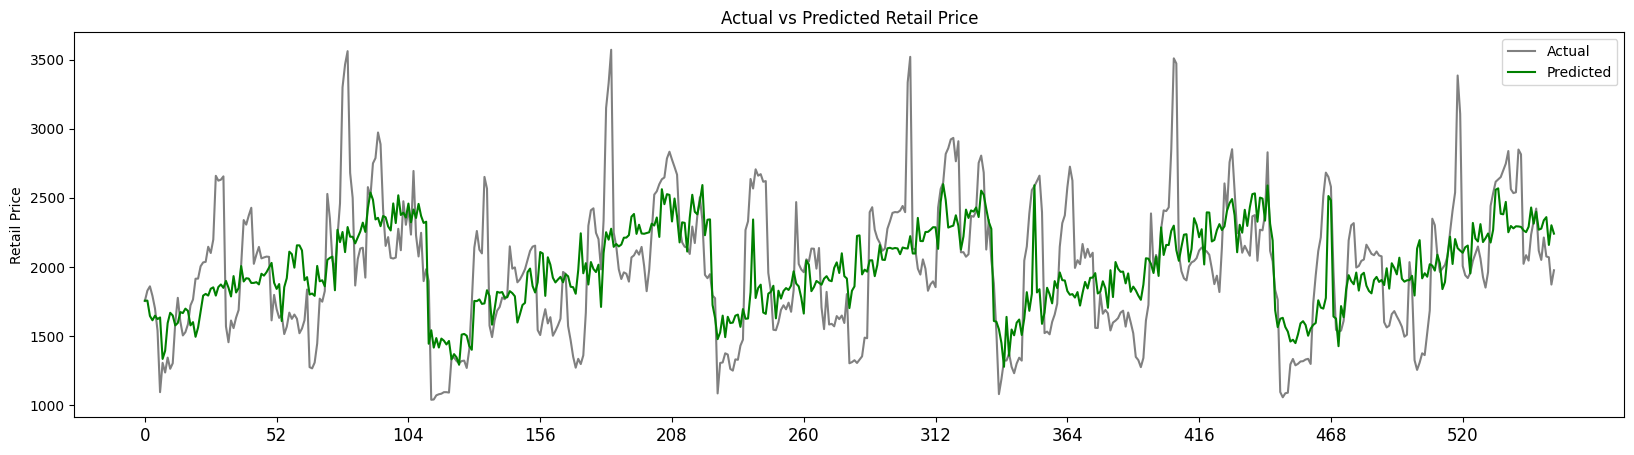

In [68]:
# 5. Actual vs Predicted 그래프
num_weeks = np.concatenate(y_test_inverse_all).shape[0]  # y_test_inverse_all의 길이로 num_weeks 정의

plt.figure(figsize=(20, 5))
plt.plot(np.concatenate(y_test_inverse_all), label='Actual', color='gray')
plt.plot(np.concatenate(y_pred_inverse_all), label='Predicted', color='green')
plt.title('Actual vs Predicted Retail Price')
plt.ylabel('Retail Price')

# X축 눈금 52주 간격으로 표시
plt.xticks(np.arange(0, num_weeks, step=52), fontsize=12)

plt.legend()
plt.show()


### RNN

In [69]:
from keras.layers import Dense, Dropout, SimpleRNN
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


# 데이터 준비
X = onion[['rainfall', 'import volume ', 'import value', 'market price']].values
y = onion[['retail price']].values

# 데이터 정규화
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
y_scaled = scalerY.fit_transform(y)

# KFold 설정 (5개의 폴드 사용)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 1. 각 폴드별 MAE, MAPE, RMSE 저장 리스트
fold_mae_scores = []
fold_mape_scores = []
fold_rmse_scores = []
fold_histories = []  # 폴드별 학습 기록 저장 리스트
y_test_inverse_all = []  # 실제값 저장 리스트
y_pred_inverse_all = []  # 예측값 저장 리스트

# 2. K-fold 검증 루프
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled)):
    print(f'Fold {fold + 1}')

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # 모델 구성 및 학습
    rnn_model = Sequential()
    rnn_model.add(SimpleRNN(32, activation='tanh', input_shape=(X_train.shape[1], 1)))
    rnn_model.add(Dropout(0.1))
    rnn_model.add(Dense(1))

    optimizer = Adam(learning_rate=0.01)
    rnn_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=100, batch_size=10, verbose=2,
                        callbacks=[early_stopping])

    # 학습 기록 저장
    fold_histories.append(history.history)

    # 예측 및 역정규화
    y_val_pred = rnn_model.predict(X_val).flatten()
    y_val_pred_inverse = scalerY.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
    y_val_inverse = scalerY.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # 성능 지표 계산 및 저장
    mae = mean_absolute_error(y_val_inverse, y_val_pred_inverse)
    mape = mean_absolute_percentage_error(y_val_inverse, y_val_pred_inverse)
    rmse = np.sqrt(mean_squared_error(y_val_inverse, y_val_pred_inverse))

    print(f'Fold {fold + 1} - MAE: {mae:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}')

    fold_mae_scores.append(mae)
    fold_mape_scores.append(mape)
    fold_rmse_scores.append(rmse)

    # 예측 및 실제값 저장
    y_test_inverse_all.append(y_val_inverse)
    y_pred_inverse_all.append(y_val_pred_inverse)

# 3. 평균 성능 출력
print(f'\nAverage MAE across all folds: {np.mean(fold_mae_scores):.4f}')
print(f'Average MAPE across all folds: {np.mean(fold_mape_scores):.4f}')
print(f'Average RMSE across all folds: {np.mean(fold_rmse_scores):.4f}')


Fold 1
Epoch 1/100


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 35ms/step - loss: 0.0526 - mae: 0.1745 - val_loss: 0.0257 - val_mae: 0.1292
Epoch 2/100
45/45 - 0s - 3ms/step - loss: 0.0290 - mae: 0.1354 - val_loss: 0.0271 - val_mae: 0.1212
Epoch 3/100
45/45 - 0s - 3ms/step - loss: 0.0286 - mae: 0.1341 - val_loss: 0.0246 - val_mae: 0.1247
Epoch 4/100
45/45 - 0s - 3ms/step - loss: 0.0280 - mae: 0.1317 - val_loss: 0.0243 - val_mae: 0.1229
Epoch 5/100
45/45 - 0s - 3ms/step - loss: 0.0274 - mae: 0.1316 - val_loss: 0.0347 - val_mae: 0.1372
Epoch 6/100
45/45 - 0s - 3ms/step - loss: 0.0273 - mae: 0.1315 - val_loss: 0.0242 - val_mae: 0.1220
Epoch 7/100
45/45 - 0s - 3ms/step - loss: 0.0256 - mae: 0.1256 - val_loss: 0.0245 - val_mae: 0.1226
Epoch 8/100
45/45 - 0s - 3ms/step - loss: 0.0264 - mae: 0.1303 - val_loss: 0.0245 - val_mae: 0.1184
Epoch 9/100
45/45 - 0s - 3ms/step - loss: 0.0256 - mae: 0.1287 - val_loss: 0.0264 - val_mae: 0.1328
Epoch 10/100
45/45 - 0s - 3ms/step - loss: 0.0253 - mae: 0.1278 - val_loss: 0.0260 - val_mae: 0.1210
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 39ms/step - loss: 0.0473 - mae: 0.1684 - val_loss: 0.0230 - val_mae: 0.1224
Epoch 2/100
45/45 - 0s - 4ms/step - loss: 0.0281 - mae: 0.1306 - val_loss: 0.0266 - val_mae: 0.1348
Epoch 3/100
45/45 - 0s - 3ms/step - loss: 0.0271 - mae: 0.1298 - val_loss: 0.0270 - val_mae: 0.1365
Epoch 4/100
45/45 - 0s - 3ms/step - loss: 0.0277 - mae: 0.1315 - val_loss: 0.0253 - val_mae: 0.1320
Epoch 5/100
45/45 - 0s - 3ms/step - loss: 0.0270 - mae: 0.1317 - val_loss: 0.0240 - val_mae: 0.1260
Epoch 6/100
45/45 - 0s - 3ms/step - loss: 0.0280 - mae: 0.1317 - val_loss: 0.0255 - val_mae: 0.1287
Epoch 7/100
45/45 - 0s - 3ms/step - loss: 0.0279 - mae: 0.1316 - val_loss: 0.0251 - val_mae: 0.1266
Epoch 8/100
45/45 - 0s - 3ms/step - loss: 0.0271 - mae: 0.1302 - val_loss: 0.0243 - val_mae: 0.1270
Epoch 9/100
45/45 - 0s - 3ms/step - loss: 0.0249 - mae: 0.1257 - val_loss: 0.0257 - val_mae: 0.1292
Epoch 10/100
45/45 - 0s - 3ms/step - loss: 0.0259 - mae: 0.1280 - val_loss: 0.0269 - val_mae: 0.1283
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 68ms/step - loss: 0.0537 - mae: 0.1758 - val_loss: 0.0287 - val_mae: 0.1387
Epoch 2/100
45/45 - 0s - 4ms/step - loss: 0.0261 - mae: 0.1272 - val_loss: 0.0273 - val_mae: 0.1322
Epoch 3/100
45/45 - 0s - 3ms/step - loss: 0.0272 - mae: 0.1316 - val_loss: 0.0290 - val_mae: 0.1333
Epoch 4/100
45/45 - 0s - 3ms/step - loss: 0.0279 - mae: 0.1310 - val_loss: 0.0341 - val_mae: 0.1392
Epoch 5/100
45/45 - 0s - 3ms/step - loss: 0.0269 - mae: 0.1310 - val_loss: 0.0274 - val_mae: 0.1325
Epoch 6/100
45/45 - 0s - 3ms/step - loss: 0.0253 - mae: 0.1270 - val_loss: 0.0277 - val_mae: 0.1351
Epoch 7/100
45/45 - 0s - 3ms/step - loss: 0.0272 - mae: 0.1309 - val_loss: 0.0332 - val_mae: 0.1418
Epoch 8/100
45/45 - 0s - 4ms/step - loss: 0.0254 - mae: 0.1270 - val_loss: 0.0283 - val_mae: 0.1337
Epoch 9/100
45/45 - 0s - 3ms/step - loss: 0.0248 - mae: 0.1254 - val_loss: 0.0301 - val_mae: 0.1336
Epoch 10/100
45/45 - 0s - 3ms/step - loss: 0.0254 - mae: 0.1276 - val_loss: 0.0325 - val_mae: 0.1394
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 1s - 33ms/step - loss: 0.0413 - mae: 0.1569 - val_loss: 0.0311 - val_mae: 0.1264
Epoch 2/100
45/45 - 0s - 3ms/step - loss: 0.0287 - mae: 0.1346 - val_loss: 0.0261 - val_mae: 0.1184
Epoch 3/100
45/45 - 0s - 3ms/step - loss: 0.0269 - mae: 0.1306 - val_loss: 0.0233 - val_mae: 0.1255
Epoch 4/100
45/45 - 0s - 3ms/step - loss: 0.0282 - mae: 0.1327 - val_loss: 0.0253 - val_mae: 0.1373
Epoch 5/100
45/45 - 0s - 3ms/step - loss: 0.0295 - mae: 0.1370 - val_loss: 0.0292 - val_mae: 0.1241
Epoch 6/100
45/45 - 0s - 3ms/step - loss: 0.0274 - mae: 0.1305 - val_loss: 0.0240 - val_mae: 0.1188
Epoch 7/100
45/45 - 0s - 3ms/step - loss: 0.0257 - mae: 0.1285 - val_loss: 0.0237 - val_mae: 0.1193
Epoch 8/100
45/45 - 0s - 3ms/step - loss: 0.0270 - mae: 0.1301 - val_loss: 0.0246 - val_mae: 0.1305
Epoch 9/100
45/45 - 0s - 3ms/step - loss: 0.0267 - mae: 0.1303 - val_loss: 0.0238 - val_mae: 0.1247
Epoch 10/100
45/45 - 0s - 4ms/step - loss: 0.0269 - mae: 0.1322 - val_loss: 0.0235 - val_mae: 0.1236
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 41ms/step - loss: 0.0367 - mae: 0.1500 - val_loss: 0.0232 - val_mae: 0.1242
Epoch 2/100
45/45 - 0s - 3ms/step - loss: 0.0276 - mae: 0.1310 - val_loss: 0.0227 - val_mae: 0.1240
Epoch 3/100
45/45 - 0s - 3ms/step - loss: 0.0281 - mae: 0.1334 - val_loss: 0.0298 - val_mae: 0.1416
Epoch 4/100
45/45 - 0s - 3ms/step - loss: 0.0268 - mae: 0.1312 - val_loss: 0.0228 - val_mae: 0.1218
Epoch 5/100
45/45 - 0s - 3ms/step - loss: 0.0262 - mae: 0.1296 - val_loss: 0.0234 - val_mae: 0.1276
Epoch 6/100
45/45 - 0s - 3ms/step - loss: 0.0274 - mae: 0.1321 - val_loss: 0.0267 - val_mae: 0.1348
Epoch 7/100
45/45 - 0s - 3ms/step - loss: 0.0272 - mae: 0.1308 - val_loss: 0.0232 - val_mae: 0.1276
Epoch 8/100
45/45 - 0s - 3ms/step - loss: 0.0269 - mae: 0.1309 - val_loss: 0.0229 - val_mae: 0.1246
Epoch 9/100
45/45 - 0s - 3ms/step - loss: 0.0262 - mae: 0.1281 - val_loss: 0.0221 - val_mae: 0.1221
Epoch 10/100
45/45 - 0s - 3ms/step - loss: 0.0275 - mae: 0.1311 - val_loss: 0.0243 - val_mae: 0.1305
Epoch 11/1

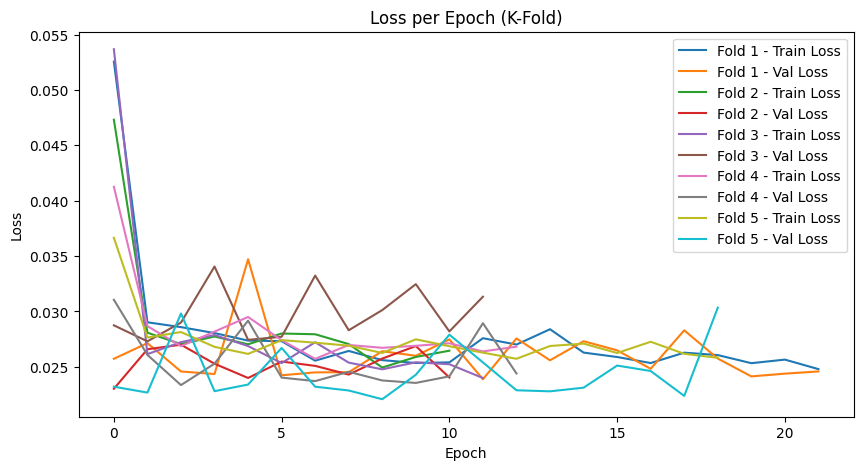

In [70]:
# 4. Loss 그래프
plt.figure(figsize=(10, 5))
for fold, history in enumerate(fold_histories):
    plt.plot(history['loss'], label=f'Fold {fold + 1} - Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {fold + 1} - Val Loss')

plt.title('Loss per Epoch (K-Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

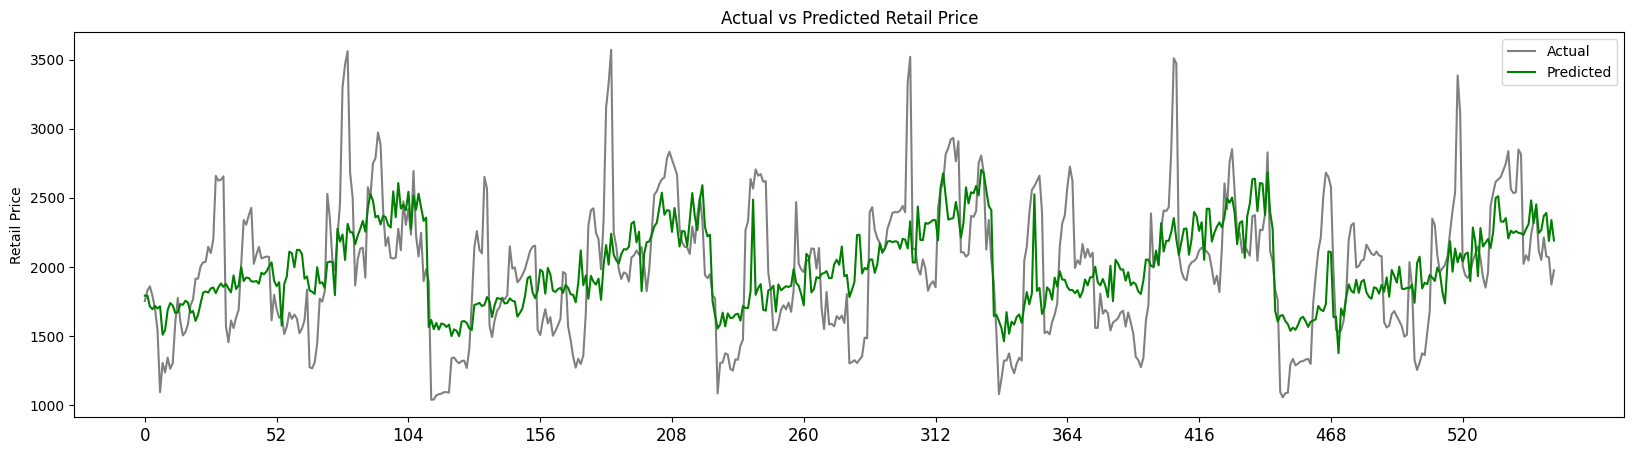

In [71]:
# 5. Actual vs Predicted 그래프
num_weeks = np.concatenate(y_test_inverse_all).shape[0]  # y_test_inverse_all의 길이로 num_weeks 정의

plt.figure(figsize=(20, 5))
plt.plot(np.concatenate(y_test_inverse_all), label='Actual', color='gray')
plt.plot(np.concatenate(y_pred_inverse_all), label='Predicted', color='green')
plt.title('Actual vs Predicted Retail Price')
plt.ylabel('Retail Price')

# X축 눈금 52주 간격으로 표시
plt.xticks(np.arange(0, num_weeks, step=52), fontsize=12)

plt.legend()
plt.show()


### shap value

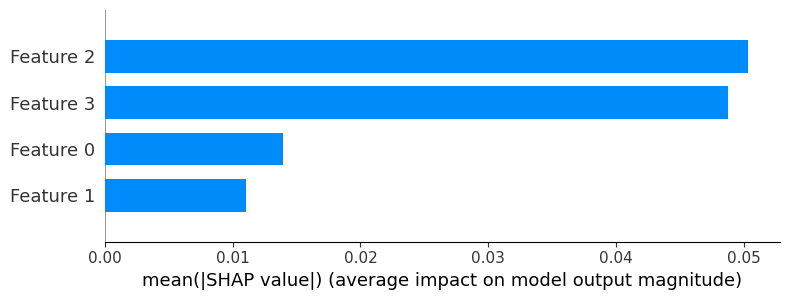

In [72]:
import shap

# 1. 해석하고자 하는 모델을 정규화된 데이터를 기반으로 SHAP 계산
explainer = shap.Explainer(gru_model, X_scaled)  # rnn_model 사용
# SHAP 계산 (검증 데이터로 해석)
shap_values = explainer(X_val.reshape(X_val.shape[0], X_val.shape[1]))  # 2D 형태로 변환

# 2. SHAP 시각화
shap.summary_plot(shap_values, X_val.reshape(X_val.shape[0], X_val.shape[1]), plot_type='bar')

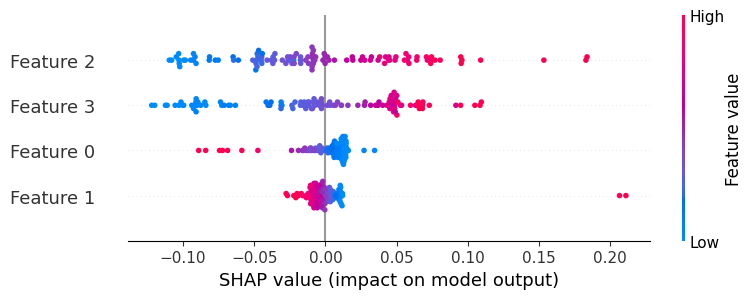

In [73]:
shap.summary_plot(shap_values, X_val.reshape(X_val.shape[0], X_val.shape[1]))

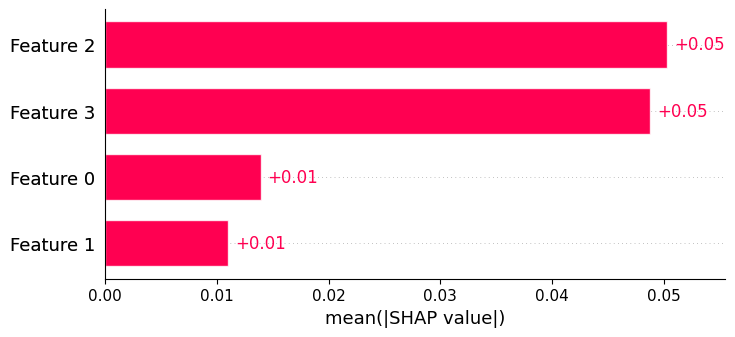

In [74]:
shap.plots.bar(shap_values)

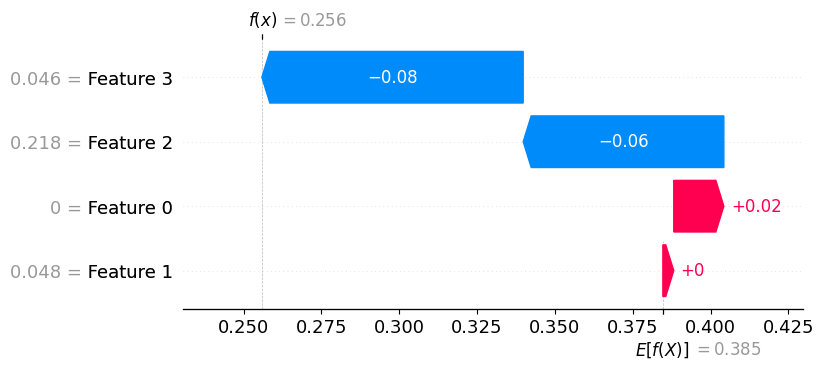

In [75]:
shap.plots.waterfall(shap_values[0])